<a href="https://colab.research.google.com/github/chrislevn/Deep-Learning-Journey/blob/master/Hack_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Nối Colab vô Drive 

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

### Đi đến thư mục chứa data

In [ ]:
# cd /content/drive/My Drive/Colab Notebooks/ProtonX/Hack1/data

In [ ]:
# !wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O ./cats_and_dogs_filtered.zip

In [ ]:
main_folder = './'
# !unzip -q cats_and_dogs_filtered.zip -d $main_folder

In [ ]:
# cd cats_and_dogs_filtered

In [ ]:
# train_folder = './train'

In [ ]:
# valid_folder = './validation'

In [6]:
!pip install --upgrade tensorflow

     |████████████████████████████████| 165.2 MB 121.5 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 24.1 MB/s eta 0:00:01
     |████████████████████████████████| 6.8 MB 23.0 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 22.5 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 6.3 MB/s  eta 0:00:01
     |████████████████████████████████| 28.8 MB 27.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 62.7 MB/s eta 0:00:01
     |████████████████████████████████| 459 kB 100.0 MB/s eta 0:00:01
     |████████████████████████████████| 127 kB 90.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 64.6 MB/s eta 0:00:01
     |████████████████████████████████| 779 kB 89.4 MB/s eta 0:00:01
     |████████████████████████████████| 93 kB 8.0 MB/s  eta 0:00:01
     |████████████████████████████████| 88 kB 22.6 MB/s eta 0:00:01
     |████████████████████████████████| 155 kB 97.0 MB/s eta 0:00:01
     |████████████████████████████

In [8]:
import numpy as np 
import matplotlib.pyplot as plt
# !pip install tensorflow-gpu==2.0.rc
import tensorflow as tf
import os 

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
# for plotting images (optional)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [11]:
# getting data
base_dir = 'cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats = os.path.join(train_dir, 'cats')
train_dogs = os.path.join(train_dir, 'dogs')
validation_cats = os.path.join(validation_dir, 'cats')
validation_dogs = os.path.join(validation_dir, 'dogs')

num_cats_tr = len(os.listdir(train_cats))
num_dogs_tr = len(os.listdir(train_dogs))
num_cats_val = len(os.listdir(validation_cats))
num_dogs_val = len(os.listdir(validation_dogs))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [15]:
BATCH_SIZE = 32
IMG_SHAPE = 150 # square image

In [12]:
#generators

#prevent memorization
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )


In [13]:
validation_image_generator = ImageDataGenerator(
    rescale=1./255)

In [16]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           class_mode='binary')

val_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=validation_dir,
                                                           shuffle=False,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


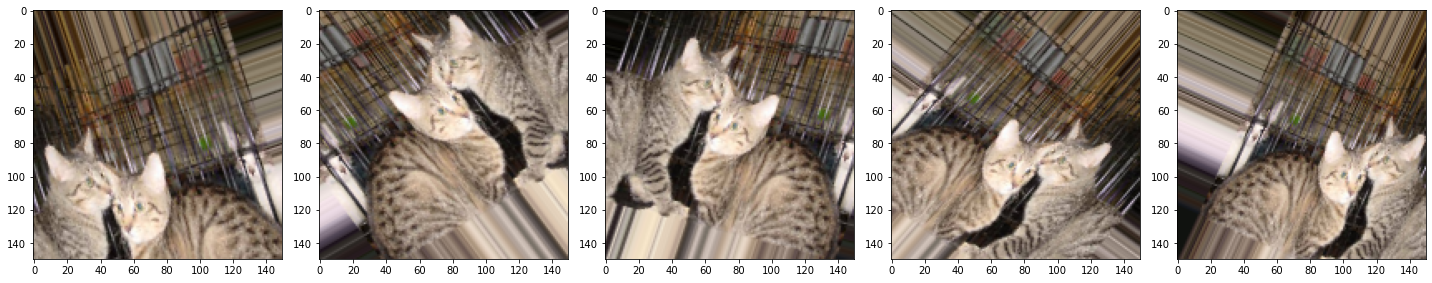

In [17]:
images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(images)


In [18]:
# model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)), # RGB
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Dropout(0.5), # 1/2 of neurons will be turned off randomly
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    
    tf.keras.layers.Dense(2, activation='softmax') #[0, 1] or [1, 0]
    
    ])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

EPOCHS = 50

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
    )



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

Epoch 43/50
63/63 [==============================] - 28s 437ms/step - loss: 0.4527 - accuracy: 0.8045 - val_loss: 0.5154 - val_accuracy: 0.7410
Epoch 44/50
63/63 [==============================] - 30s 477ms/step - loss: 0.4635 - accuracy: 0.7860 - val_loss: 0.4761 - val_accuracy: 0.7690
Epoch 45/50
63/63 [==============================] - 28s 440ms/step - loss: 0.4542 - accuracy: 0.7875 - val_loss: 0.4973 - val_accuracy: 0.7640
Epoch 46/50
63/63 [==============================] - 28s 437ms/step - loss: 0.4306 - accuracy: 0.7960 - val_loss: 0.5217 - val_accuracy: 0.7370
Epoch 47/50
63/63 [==============================] - 28s 437ms/step - loss: 0.4476 - accuracy: 0.7860 - val_loss: 0.5012 - val_accuracy: 0.7530
Epoch 48/50
63/63 [==============================] - 28s 443ms/step - loss: 0.4347 - accuracy: 0.7985 - val_loss: 0.4773 - val_accuracy: 0.7820
Epoch 49/50
63/63 [==============================] - 28s 440ms/step - loss: 0.4471 - accuracy: 0.7895 - val_loss: 0.4731 - val_accuracy:

In [19]:
# analysis
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

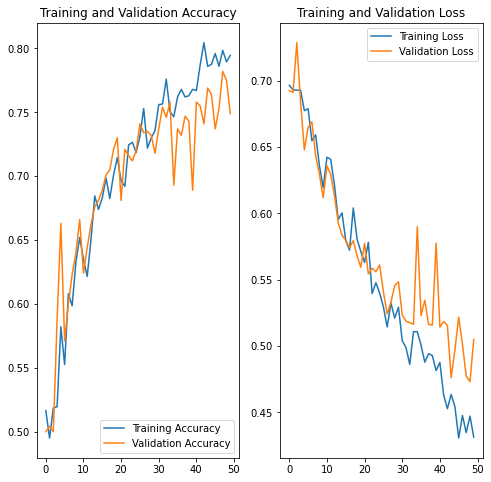

In [20]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### [TODO 1] Xây dựng mô hình Deep Learning

### [TODO 2] Thực hiện training

In [24]:
import tensorflow as tf

DESIRED_ACCURACY = 0.7

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_acc')>DESIRED_ACCURACY):
            print("\nReached 70% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [25]:
history = model.fit_generator(
    callbacks=[callbacks],
)

TypeError: fit_generator() missing 1 required positional argument: 'generator'

### [TODO 3] Thực hiện load file và dự đoán

### Hiển thị độ chính xác của mô hình

In [26]:
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

KeyError: 'acc'